In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [162]:
def load_data():
    file = 'bakerysales.csv'
    df = pd.read_csv(file)
    return df

In [163]:
df = load_data()

In [164]:
df.rename(columns={'Unnamed: 0':'id','article':'product','quantity':'quantity'},inplace=True)

In [165]:
df.head()

,id,date,time,ticket_number,product,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [166]:
df.unit_price

0         0,90 €
1         1,20 €
2         1,20 €
3         1,15 €
4         1,20 €
           ...  
234000    0,15 €
234001    1,20 €
234002    0,15 €
234003    1,30 €
234004    1,30 €
Name: unit_price, Length: 234005, dtype: object

In [167]:
df.unit_price = df.unit_price.str.replace(',','.').str.replace('€', '').str.strip()

In [168]:
df.unit_price = df.unit_price.astype('float')

Research questions on bakery sales data

1. How does the sales volume vary over time (date)
2. what is the average units price for each products?
3. Is there a correlation between unit price and total sales
4. Is there a pattern in sales based on date or time of purchased?
5. How does qty sold vary over time?
6. What is the contribution of each products to the revenue
7. Do we have frequent buyers based on ticket numbers?
8. Which article have the lowest and highest sales?

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   product        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.5+ MB


In [170]:
df['date'] = pd.to_datetime(df['date'])

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   product        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 12.5+ MB


In [172]:
# calculate sales
df['sales'] = df.quantity = df.unit_price

C:\Users\DELL\AppData\Local\Temp\ipykernel_6352\3063126455.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df['sales'] = df.quantity = df.unit_price


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   product        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  float64       
 7   sales          234005 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 14.3+ MB


In [174]:
daily_sales = df.groupby('date')['sales'].sum()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   product        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  float64       
 7   sales          234005 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 14.3+ MB


In [176]:
daily_sales = df.groupby('date')['sales'].sum()

In [177]:
daily_sales

date
2021-01-02    716.95
2021-01-03    782.85
2021-01-04    340.00
2021-01-05    424.65
2021-01-07    428.30
               ...  
2022-09-26    534.60
2022-09-27    622.95
2022-09-28    488.30
2022-09-29    496.40
2022-09-30    579.75
Name: sales, Length: 600, dtype: float64

In [178]:
df['sales'] = df.quantity* df.unit_price

In [179]:
daily_sales = df.groupby('date')['sales'].sum()

In [180]:
daily_sales_df = daily_sales.reset_index().rename(columns={'sales':"total sales"})


In [181]:
daily_sales_df

,date,total sales
0,2021-01-02,3687.1875
1,2021-01-03,4437.7875
2,2021-01-04,1116.6800
3,2021-01-05,1524.5275
4,2021-01-07,2095.8800
...,...,...
595,2022-09-26,1908.9500
596,2022-09-27,2292.9325
597,2022-09-28,1556.3550
598,2022-09-29,1439.0950


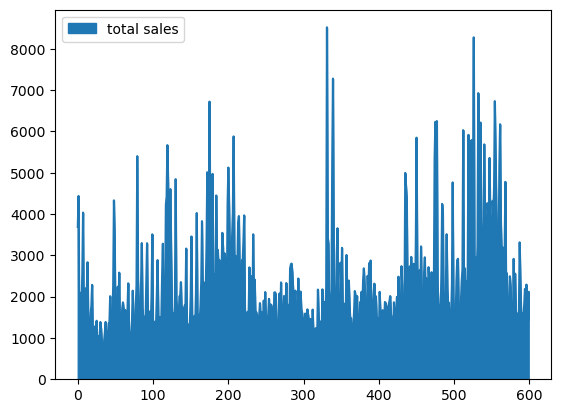

In [182]:
ax = daily_sales_df.plot.area(y='total sales')

In [183]:
ax= daily_sales_df.plot

In [184]:
# for quantity
daily_qty_sold = df.groupby('date')['quantity'].sum()
daily_qty_sold_df = daily_qty_sold.reset_index().rename(columns = {'quantity':"total_qty"})

KeyError: 'Column not found: quantity'